# DD2367 - Programing Assignment III: Quantum Arithmetics, QFT & Quantum walk #

Authors: Scott McHaffie, Jai Iyer, Venkatesh Elayaraja

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from circleNotationClass import QubitSystem
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector


DTYPE = np.complex128

# **Task 1:** Quantum Arithmetics


This exercise aims to implement 3-qubit increment and decrement operators, =+ -=, using the IBM Qiskit framework and its Aer quantum computer simulator.

---

## **Task 1.1:** Increment and Decrement Operators

1. Prepare a superposition of quantum states using HAD QPU instructions. You can decide freely which superposition. This will determine the concurrent increment or decrement operator.

In [3]:
# Function to get statevector from Aer simulator
def statevector_from_aer(circ: QuantumCircuit) -> np.ndarray:
    backend = Aer.get_backend("aer_simulator_statevector")
    tqc = transpile(circ, backend)
    result = backend.run(tqc).result()
    return np.asarray(result.get_statevector(tqc), dtype=np.complex128)

# Initialise 3-qubit register
qc_id = QuantumCircuit(3, name="R")

# Create superposition  of |0> and |4> states
qc_id.h(2)


2. Plot the quantum states using the circle notation. 

In [35]:
# Please implement the circle notation visualization here
qc_id_state = np.sqrt(2) * Statevector(qc_id)
print (np.real(qc_id_state))

[1. 0. 0. 0. 1. 0. 0. 0.]


3. Perform an increment operation (by 1) +=

In [36]:
## INCREMENT CIRCUIT ##

# Step 1: Apply CCNOT | Control Qubits: 0, 1 | Target Qubit: 2
qc_id.ccx(0, 1, 2)

# Step 2: Apply CNOT | Control Qubits: 0 | Target Qubit: 1
qc_id.cx(0, 1)

# Step 3: Apply X gate | Target Qubit: 0
qc_id.x(0)

4. Plot the quantum states using the circle notation. 

In [37]:
# Please implement the circle notation visualization here
qc_id_state = np.sqrt(2) * Statevector(qc_id)
print (np.real(qc_id_state))

[0. 1. 0. 0. 0. 1. 0. 0.]


5. Perform a decrement operation (by 1) -=

In [38]:
## DECREMENT CIRCUIT ##

# Step 1: Apply X gate | Target Qubit: 0
qc_id.x(0)

# Step 2: Apply CNOT | Control Qubits: 0 | Target Qubit: 1
qc_id.cx(0, 1)


# Step 3: Apply CCNOT | Control Qubits: 0, 1 | Target Qubit: 2
qc_id.ccx(0, 1, 2)

6. Plot the quantum states using the circle notation. 

In [39]:
# Please implement the circle notation visualization here
qc_id_state = np.sqrt(2) * Statevector(qc_id)
print (np.real(qc_id_state))

[1. 0. 0. 0. 1. 0. 0. 0.]


## **Task 1.2** - Overflow & Underflow / Negative Numbers

# **Task 2:** Quantum Fourier Transform

---


# **Task 2.1** $-$ QFT and Preparation Circuit

In [49]:
from qiskit.visualization import circuit_drawer
from qiskit.utils.optionals import HAS_MATPLOTLIB
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Create a custom style
custom_style = {
    "fig_width": 10,  # Set desired width in inches
    "fig_height": 6,  # Set desired height in inches
    "dpi": 300        # Set desired resolution
}




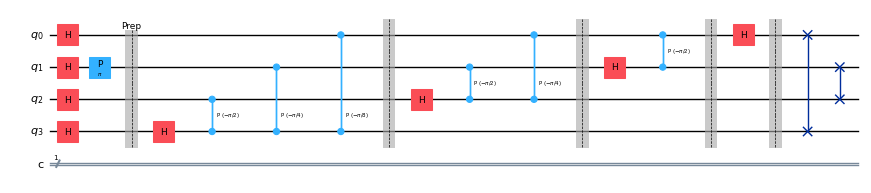

In [97]:
qc_id = QuantumCircuit(3, name="R")

qc_qft = QuantumCircuit(4, 1, name="QFT")

# prep signal
qc_qft.h([0, 1, 2, 3])
qc_qft.p(np.pi, 1)
qc_signal = qc_qft.copy()
qc_qft.barrier([0,1,2,3], label="Prep")

# QFT
qc_qft.h(3)
qc_qft.cp(-np.pi/2, 2, 3)
qc_qft.cp(-np.pi/4, 1, 3)
qc_qft.cp(-np.pi/8, 0, 3)
qc_qft.barrier([0,1,2,3])

qc_qft.h(2)
qc_qft.cp(-np.pi/2, 1, 2)
qc_qft.cp(-np.pi/4, 0, 2)
qc_qft.barrier([0,1,2,3])

qc_qft.h(1)
qc_qft.cp(-np.pi/2, 0, 1)
qc_qft.barrier([0,1,2,3])

qc_qft.h(0)
qc_qft.barrier([0,1,2,3])

qc_qft.swap(0, 3)
qc_qft.swap(1, 2)
# qc_qft.barrier([0,1,2,3], label="QFT")

qc_qft.draw(output="mpl", scale=0.5)


[ 0.25+0.000000e+00j  0.25+0.000000e+00j -0.25-3.061617e-17j
 -0.25-3.061617e-17j  0.25+0.000000e+00j  0.25+0.000000e+00j
 -0.25-3.061617e-17j -0.25-3.061617e-17j  0.25+0.000000e+00j
  0.25+0.000000e+00j -0.25-3.061617e-17j -0.25-3.061617e-17j
  0.25+0.000000e+00j  0.25+0.000000e+00j -0.25-3.061617e-17j
 -0.25-3.061617e-17j]


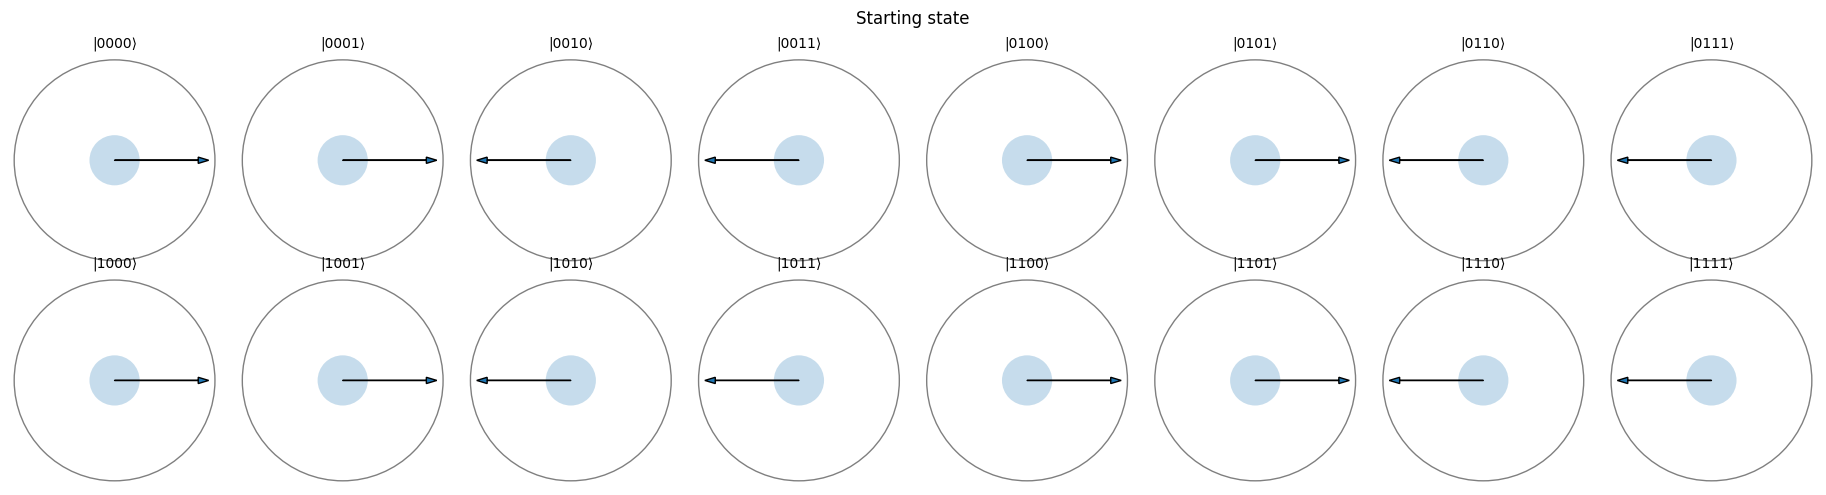

In [68]:
qc_signal.save_statevector()
signal_sv = statevector_from_aer(qc_signal)
print (signal_sv)
QubitSystem(signal_sv, label="Starting state").viz_circle()

[-3.25176795e-17-1.13619170e-32j  1.42629634e-33-1.99113361e-33j
  5.00000000e-01-5.00000000e-01j  5.00000000e-01+5.00000000e-01j
 -3.69396842e-17+2.79968846e-17j -1.15966893e-17-1.53009182e-17j
  1.90194807e-17+2.61928535e-18j -6.32351420e-18+4.59170882e-17j
 -1.16347285e-17+1.42550604e-17j -2.83550781e-18-2.31429139e-18j
  2.50353822e-17-2.53385655e-18j  3.79218431e-18+3.74680973e-17j
 -3.31648021e-17+1.78419415e-17j -1.19216042e-17-2.21600123e-17j
  3.50530860e-18+1.05302458e-18j -5.29391207e-18+1.76223764e-17j]


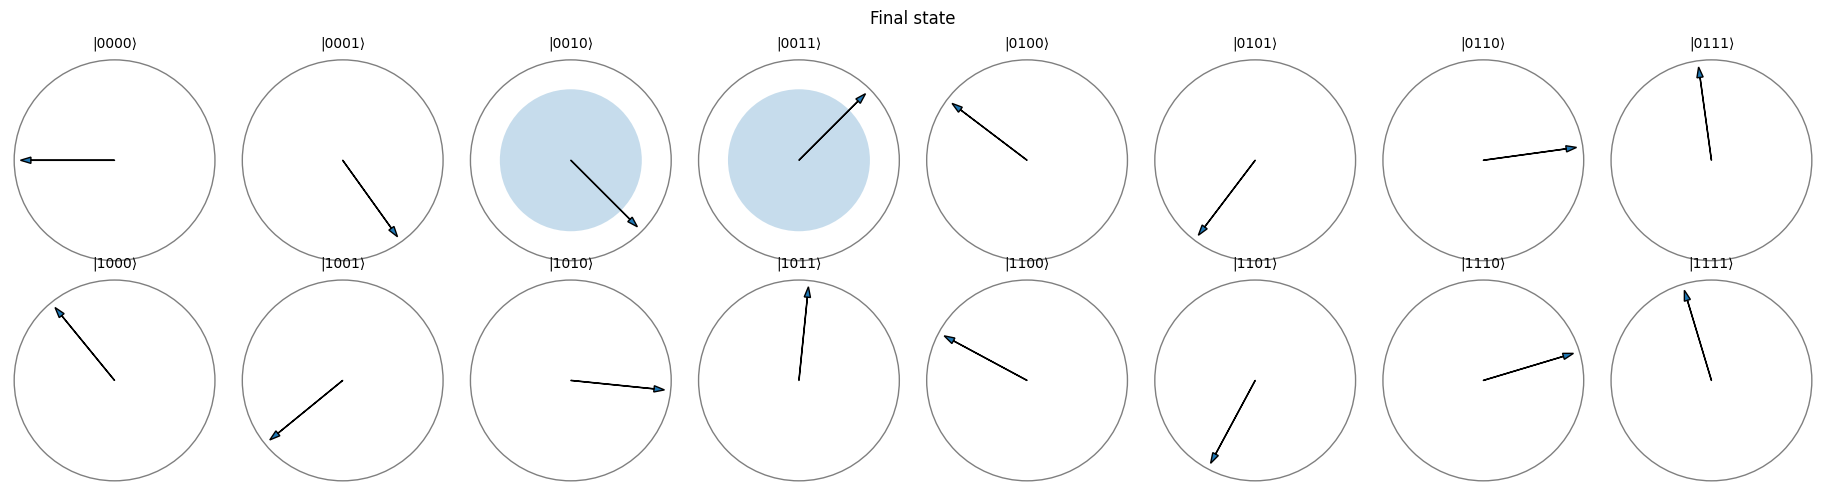

In [96]:
qft_copy = qc_qft.copy()
qft_copy.save_statevector()
qft_sv = statevector_from_aer(qft_copy)
print (qft_sv)
QubitSystem(qft_sv, label="Final state").viz_circle()

[ 0.25  0.25 -0.25 -0.25  0.25  0.25 -0.25 -0.25  0.25  0.25 -0.25 -0.25
  0.25  0.25 -0.25 -0.25]


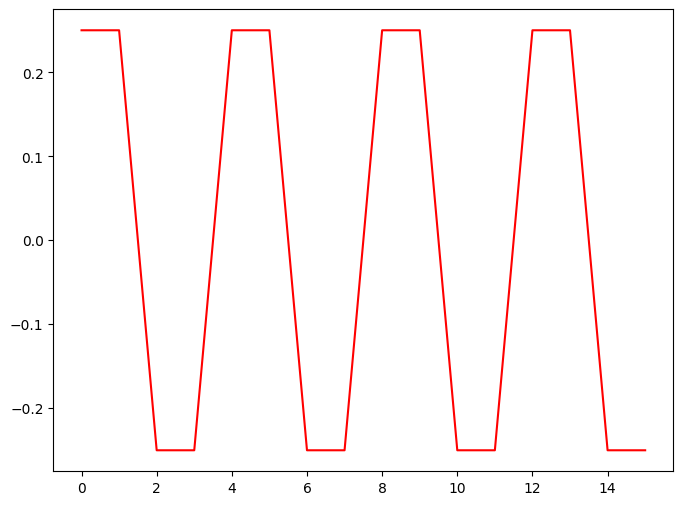

[2.44929360e-16 3.20112637e-16 2.90176727e-16 6.84118960e-16
 2.82842712e+00 4.51339148e-16 4.57489902e-16 2.24571934e-15
 2.66453526e-15 2.06648969e-15 1.47623309e-15 3.49903527e-15
 2.82842712e+00 2.63108987e-15 9.64683051e-16 2.68339438e-15]


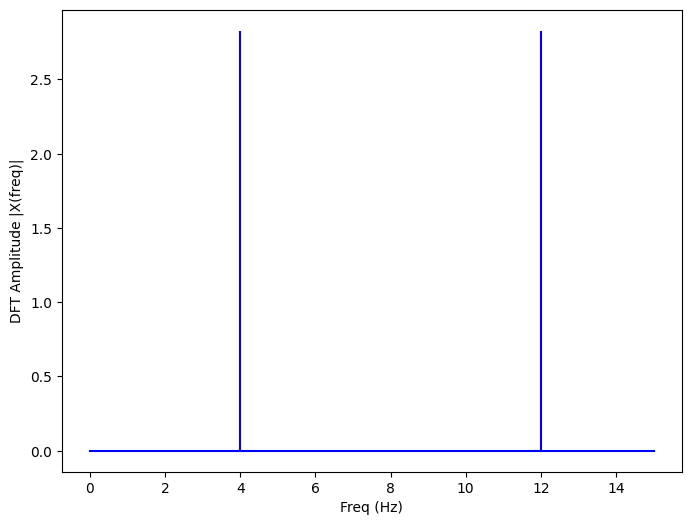

In [91]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

# sampling rate
sr = 16
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

print (np.real(signal_sv))

plt.figure(figsize = (8, 6))
plt.plot(np.arange(16), np.real(signal_sv), 'r')
plt.show()

# print (np.arange(16))

X = DFT(signal_sv)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

print (abs(X))
plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()


[0.-2.4492936e-16j 0.+0.0000000e+00j 0.+0.0000000e+00j 0.+0.0000000e+00j
 2.-2.0000000e+00j 0.+0.0000000e+00j 0.+0.0000000e+00j 0.+0.0000000e+00j
 0.+0.0000000e+00j 0.+0.0000000e+00j 0.+0.0000000e+00j 0.+0.0000000e+00j
 2.+2.0000000e+00j 0.+0.0000000e+00j 0.+0.0000000e+00j 0.+0.0000000e+00j]


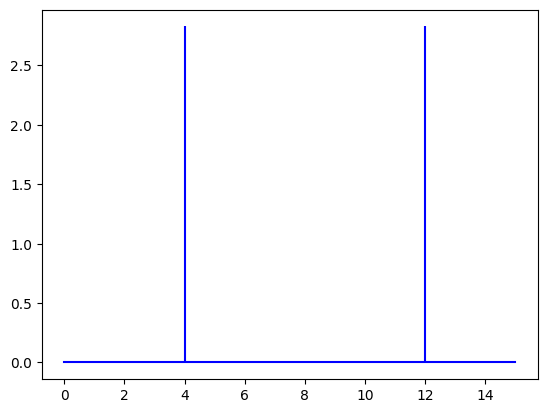

In [95]:
# for fft using np 
fft_result = np.fft.fft(signal_sv)
print (fft_result)

plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.show()